# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [35]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [36]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [37]:
def display_images(batch):
    # color map
    color_map = {1: 'red', 2: 'blue', 4: 'green'}


    fig, ax = plt.subplots() 
    im = batch["image"].numpy()
    ax.imshow(im)

    # draw bounding boxes and add color to different class labels
    for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
        xy = (coord[1]*im.shape[1], coord[0]*im.shape[0])
        #taken from class notes
        width = (coord[3] - coord[1])*im.shape[1]
        height = (coord[2] - coord[0])*im.shape[0]
        rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
        ax.add_patch(rec)
    plt.axis("off")

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 720x720 with 0 Axes>

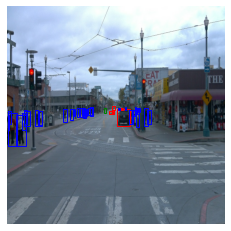

In [38]:
# Display 10 random images in dataset
plt.figure(figsize = (10, 10))
# The bower crash randomly when display 10 images
for i in range(1):
    for batch in dataset.shuffle(50).take(1):
        # batch = dataset.shuffle(75)[0]
        display_images(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [46]:
num_data = 0
class_count = {1: 0, 2: 0, 4: 0}
mean_pixel_vals = []
full_class_count = {}

for idx, train_data in enumerate(dataset):
    num_data += 1
    image = train_data['image'].numpy()
    classes = train_data['groundtruth_classes'].numpy()
 
    for obj_class in classes:
        class_count[obj_class] += 1
    
    

    # Calculate the mean pixel value of the image
    # mean_pixel_vals.append(np.mean(image))
    
    if num_data == 60000:
        break

print(f'Total number of data: {num_data}')

Total number of data: 60000


{1: 1035407, 2: 290753, 4: 7481}


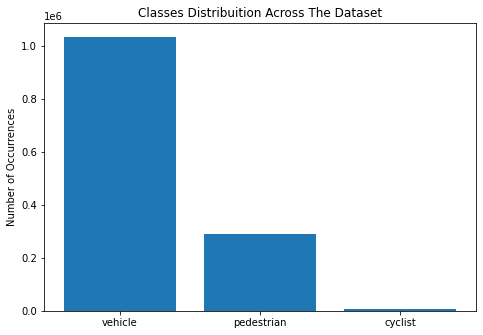

In [48]:
number_of_vehicles = class_count[1]
number_of_pedestrians = class_count[2]
number_of_cyclists = class_count[4]
print(class_count)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.set_title('Classes Distribuition Across The Dataset')
ax.set_ylabel('Number of Occurrences')

labels = ['vehicle', 'pedestrian', 'cyclist']
values = [number_of_vehicles, number_of_pedestrians, number_of_cyclists]
ax.bar(labels, values)
plt.show()

Text(0, 0.5, 'Frequeny')

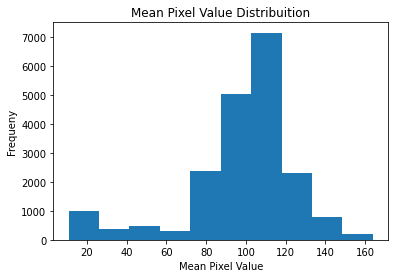

In [33]:
plt.hist(mean_pixel_vals)
plt.title('Mean Pixel Value Distribuition')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequeny')